In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import re


In [2]:
df = pd.read_csv('first_v2_mod.csv', sep = ';')

In [3]:
# Convert 'date_connected' to date_time
dc = df['date_connected']
dc_right = []
for data in dc:
    dc_right.append( dt.strptime(data, '%Y-%m-%d'))

df['date_connected'] = dc_right
df.head()

0    2019-06-06
1    2019-05-30
2    2019-05-30
3    2019-05-29
4    2019-05-02
Name: date_connected, dtype: object

In [4]:
df.head()

,Unnamed: 0,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected,city,region,country
0,0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06,Coventry,NaN,United Kingdom
1,1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Brindisi,NaN,Italy
2,2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Avezzano,Abruzzo,Italy
3,3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-29,Lecce,Apulia,Italy
4,4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-02,Savona,Liguria,Italy


In [59]:
job = []
company = []

for k in range(len(df)):
    test_string = re.sub('\&amp;', '&', df['occupation'][k])
    res = re.split('(?: at )|(?: presso )|(?: bei )',  test_string)
    job.append(res[0])
    if len(res) > 1:
        company.append(res[1])
    else:
        company.append('')

In [61]:
df['job'] = job
df['company'] = company

In [20]:
df.to_csv(path_or_buf = 'first_v3.csv', sep = ';')

In [2]:
df = pd.read_csv('./csv_files/first_v3.csv', sep = ';')
df.head()

,Unnamed: 0,Unnamed: 0.1,name,link,occupation,location,mutual_raw,date_connected_string,see_connections_link,date_connected,city,region,country,job,company
0,0,0,Madhu Shurpali,/in/madhu-shurpali-2aabab14/,Project Manager at Tata Technologies,"Coventry, United Kingdom",10 Mutual Connections,"June 6, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-06-06,Coventry,NaN,United Kingdom,Project Manager,Tata Technologies
1,1,1,Ivan Lafuenti,/in/ivan-l-b7458932/,Design Engineering at Giannuzzi srl,"Brindisi Area, Italy","['2 Mutual Connections', 'You both studied at ...","May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Brindisi,NaN,Italy,Design Engineering,Giannuzzi srl
2,2,2,Tiziano Ruggiero,/in/tiziano-ruggiero-2011b2164/,Responsabile del reparto tecnico di produzione...,"Avezzano, Abruzzo, Italy",Tiziano started a new position as Responsabile...,"May 30, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-30,Avezzano,Abruzzo,Italy,Responsabile del reparto tecnico di produzione,PROMECC AEROSPACE S.R.L.
3,3,3,Antonio Guerrieri,/in/antonio-guerrieri/,Ingegnere at Università del Salento,"Lecce, Apulia, Italy",You both studied at Università del Salento,"May 29, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-29,Lecce,Apulia,Italy,Ingegnere,Università del Salento
4,4,4,Lorenzo Gagliardi,/in/lorenzo-gagliardi-72049b45/,Ing,"Savona, Liguria, Italy","['19 Mutual Connections', 'You both worked at ...","May 2, 2019",/search/results/people/?facetConnectionOf=%5B%...,2019-05-02,Savona,Liguria,Italy,Ing,NaN


In [98]:
def str_count(regexp, series):
    cc = []
    for q in range(len(regexp)):
        out = 0
        for k in range(len(series)):
            res =re.findall(regexp[q], series[k],  re.IGNORECASE)
            if len(res) >0:
                out +=1
        cc.append(out)
    return cc

In [196]:
labs = ['JLR', 'FIAT Group','McLaren','Aston Martin','Ford','Opel','Tata']
regexp = ['(Jaguar)|(Rover)','(fiat)|(iveco)|(ferrari)|(maserati)|(cnh)','mclaren','Aston','tata','ford','opel']
cc = str_count(regexp, df['company'])
comp_df = pd.DataFrame(cc, index = labs,columns=['count'])
comp_df

,count
JLR,44
FIAT Group,24
McLaren,7
Aston Martin,6
Ford,2
Opel,1
Tata,1


<Figure size 720x432 with 0 Axes>

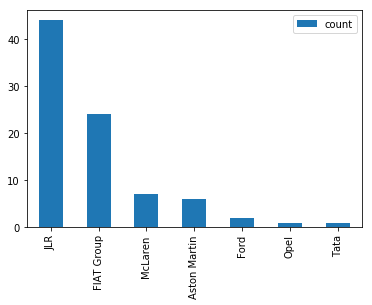

In [199]:
plt.figure(figsize = (10,6))
comp_df.plot(kind='bar')
plt.savefig('company_pareto.png')

In [79]:
df['company'].value_counts()

                                                                  99
Jaguar Land Rover                                                 38
CNH Industrial                                                     8
IVECO                                                              5
McLaren Automotive Ltd                                             5
Aston Martin Lagonda Ltd                                           4
Jaguar Land Rover UK                                               2
Aston Martin Lagonda                                               2
Iveco                                                              2
Maserati                                                           2
Strategic Innovation Ltd                                           1
Jonathan Lee Recruitment (B2B & Contract Recruitment Division)     1
Magirus GmbH                                                       1
EnginSoft UK                                                       1
Leam Financial Services.          

In [82]:
df['job'].value_counts()

Mechanical Engineer                                                                                                      2
--                                                                                                                       2
Technical Specialist                                                                                                     2
Ingegnere                                                                                                                2
President                                                                                                                2
Account Manager                                                                                                          2
Senior Engineer                                                                                                          2
Director                                                                                                                 2
Vehicle Dynamics

In [7]:
cc = 0
nm =[]
for k in range(len(df)):
    if 'HR' in df['job'][k]:
        cc +=1
        nm.append(df['job'][k])
nm

['HR Recruitment Specialist ',
 'Global Talent Acquisition & HR Professional  E: Gridukltd@gmail.com Skype: james.hosken1          54,236+ connections',
 'HR & Recruitment Manager',
 'HR Specialty Medical',
 'HR Recruiter',
 'Assistant Manager - HR',
 'HR recruiter MINERVA SrL Mo IT 059 219021  minerva2000@minerva2000.it']

In [155]:
all_job_words = []

for k in range(len(df)):
    tr = re.split('[\s,&]',df['job'][k])
    all_job_words += tr

all_job_words

['Project',
 'Manager',
 'Design',
 'Engineering',
 'Responsabile',
 'del',
 'reparto',
 'tecnico',
 'di',
 'produzione',
 'Ingegnere',
 'Ing',
 'Lead',
 'Engineer',
 '-',
 'CAE',
 'Methods',
 '',
 '',
 'Tools',
 '(Suspension',
 'Systems',
 'Tuning)',
 'Student',
 'Entrepreneur',
 '',
 'Analytics',
 'and',
 'Data',
 'Consultant.',
 'Engineering',
 'Leader',
 '-',
 'Powertrain',
 'Dept',
 '',
 'JLR',
 'Business',
 'Development',
 'Manager',
 '(Aerodynamics',
 '',
 'Thermal',
 'Management',
 '',
 '',
 'Fuel',
 'Efficiency)',
 'Mechanical',
 'Engineer;',
 'MBA',
 'in',
 'Project',
 'Management',
 'Handling',
 'test',
 'development',
 'engineer',
 'IDE',
 'Entrepreneurship',
 '/',
 'Automotive',
 'Technical',
 'Manager',
 'Vehicle',
 'Dynamics',
 'Controls',
 '',
 '',
 'Simulation',
 'Project',
 'Development',
 'Manager',
 'Operations',
 'Manager',
 'Specialist',
 'recruiting',
 'consultant',
 'Utilise',
 'data',
 'analytics',
 'and',
 'modelling',
 'to',
 'recommend',
 'strategic',
 '',
 

In [156]:
jw = pd.DataFrame(all_job_words,columns=['words'])

In [181]:
ix = (jw['words'] != '')  & (jw['words'] != 'and') & (jw['words'] != 'del') & (jw['words'] != '|') & (jw['words'] != 'di') &\
    (jw['words'] != 'in') & (jw['words'] != 'of') & (jw['words'] != '-')
jn=jw[ix]
job_value_count = jn['words'].value_counts()

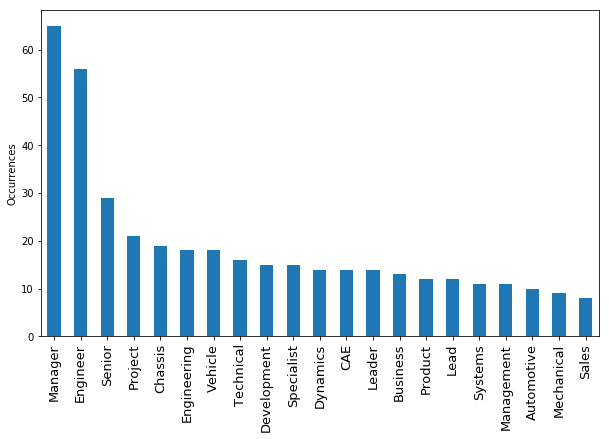

In [188]:
plt.figure(figsize = (10,6))
job_value_count.plot(kind = 'bar')
plt.xlim(-.5, 20.5);
plt.ylabel('Occurrences');
plt.xticks(fontsize = 13);
plt.savefig('Job_words_hist.png')


In [192]:
regexp = ['manage','(engineer|ingegner)',\
          'senior','(mechanic|meccanic)','vehicle dynamics','CAE','Data Analyst','President','Director','Lead ','Group Leader','Chief','Manager','HR',\
         'student','research','project.*manager','sales','network','militar','consultant','industr']
jc = str_count(regexp, df['job'])
jc

[74, 84, 29, 10, 12, 15, 1, 3, 9, 9, 5, 5, 67, 9, 2, 3, 11, 7, 3, 2, 11, 6]

In [191]:
job_value_count

Manager          65
Engineer         56
Senior           29
Project          21
Chassis          19
Engineering      18
Vehicle          18
Technical        16
Development      15
Specialist       15
Dynamics         14
CAE              14
Leader           14
Business         13
Product          12
Lead             12
Systems          11
Management       11
Automotive       10
Mechanical        9
Sales             8
Consultant        8
Director          8
Group             8
Analyst           7
Integration       7
de                7
engineer          7
Marketing         7
HR                7
                 ..
infotainment      1
na                1
FCV               1
Efficiency)       1
Advisor           1
industrial        1
Industries        1
joint             1
bushings'         1
Subject           1
media             1
SME               1
(Aerodynamics     1
Expert            1
matematica        1
enjoying          1
recruiter         1
SVP               1
INTELLIGENCE      1


In [193]:
len(job_value_count)

609

In [201]:
lung =[]
for k in range(len(df)):
    lung.append(len(df['job'][k]))

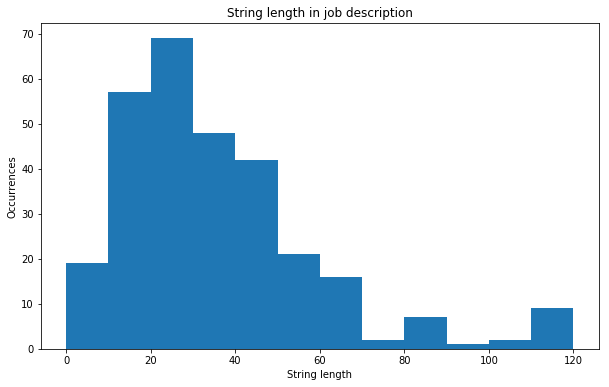

In [213]:
plt.figure(figsize = (10,6))
plt.hist(lung, bins = np.linspace(0,120,13));
plt.title('String length in job description');
plt.ylabel('Occurrences')
plt.xlabel('String length')
plt.savefig('Job_string_length.png')

In [215]:
nl = pd.Series(lung)

In [218]:
nl.idxmax()

107

In [221]:
df['job'][nl>115]

96     Global Talent Acquisition & HR Professional  E...
107    Embedded software designer and developer (auto...
137    Human Resource management | Marketing and Comm...
150    Founder of Twin Spring Coupling - New flexible...
183    Retired Engineer, enjoying life after being em...
Name: job, dtype: object

In [222]:
df['job'][183]

'Retired Engineer, enjoying life after being employed in the Automotive Industry as a Manufacturing and Design Engineer.'

In [224]:
df['name'][183]

'Robert Bird'